In [1]:
from predictor.predict import predict_rdkit_morgan

predict_rdkit_morgan(
    smiles="CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4",
    model_name="catboost",
)

7.34589545595378

In [2]:
from predictor.predict import predict_rdkit_morgan
import pandas as pd

df = pd.read_csv(r"data\CHEMBL262_clean.csv")
#canonical_smiles
df_res = pd.DataFrame()
df_res["smiles"] = df["canonical_smiles"]
# применяем функцию через лямбду
df_res["prediction"] = df["canonical_smiles"].apply(
    lambda s: predict_rdkit_morgan(smiles=s, model_name="catboost")
)

# сохраняем результат, если нужно
df_res.to_csv("rdkit_mor_predicted.csv", index=False)

print(df_res.head())

                                              smiles  prediction
0  CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...    7.345895
1     Cn1cc(C2=C(c3ccc(Cl)cc3Cl)C(=O)NC2=O)c2ccccc21    7.849043
2          COc1ccc(CNC(=O)Nc2ncc([N+](=O)[O-])s2)cc1    6.132392
3   O=C1Cc2c([nH]c3ccc([N+](=O)[O-])cc23)-c2ccccc2N1    8.030140
4            O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1    6.622320


In [33]:
import pandas as pd
from predictor.predict import predict_rdkit_morgan
from rdkit import Chem
import time  # необязательно, но можно добавить задержку

# читаем smiles из файла
df = pd.read_csv("data\stage2_1.csv")

# функция-обёртка с проверкой валидности SMILES
def safe_predict(smiles):
    if not isinstance(smiles, str) or smiles.strip() == "":
        return None
    
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    
    try:
        return predict_rdkit_morgan(smiles=smiles, model_name="catboost")
    except Exception as e:
        print(f"Ошибка при предсказании для SMILES {smiles}: {e}")
        return None

# параметры разбиения
batch_size = 5000
n_batches = len(df) // batch_size + int(len(df) % batch_size != 0)

# создаём пустой датафрейм для результатов
results = []

for i in range(n_batches):
    start = i * batch_size
    end = min((i + 1) * batch_size, len(df))
    print(f"Обработка батча {i + 1}/{n_batches} — строки {start}:{end}")
    
    batch = df.iloc[start:end].copy()
    batch["prediction"] = batch["SMILES"].apply(safe_predict)
    
    results.append(batch)
    
    # можно по желанию сохранять промежуточные батчи:
    batch.to_csv(f"new_batch_{i+1}_predicted.csv", index=False)

    # time.sleep(1)  # если нужно дать системе "подышать"

# объединяем все части
df_predicted = pd.concat(results, ignore_index=True)

# сохраняем итог
df_predicted.to_csv("new_full_random1_predicted.csv", index=False)
print("Готово.")

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\belev\AppData\Local\Temp\ipykernel_22296\1470787158.py:7: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("data\stage2_1.csv")


Обработка батча 1/10 — строки 0:5000


[20:15:04] Can't kekulize mol.  Unkekulized atoms: 0 1 7 8 9 13 14 15 16
[20:15:12] Can't kekulize mol.  Unkekulized atoms: 0 4
[20:15:12] SMILES Parse Error: ring closure 3 duplicates bond between atom 7 and atom 19 for input: 'C(#N)c1cccc(C23OCC4OC(c5ccccc5)(C23)c2ccccc2)cc41'
[20:15:15] Can't kekulize mol.  Unkekulized atoms: 0 4 5 6 7 19 20 21 22
[20:15:20] Explicit valence for atom # 4 C, 5, is greater than permitted
[20:15:22] SMILES Parse Error: unclosed ring for input: 'N1(CC(=O)NCc2nc3c(c(=O)[nH]2)COCC3)C(=O)C(N2CCC(Cc3ccc(F)cc4)CC(CC3)C2)CCC1'
[20:15:29] Can't kekulize mol.  Unkekulized atoms: 0 1 2 16 17 18 19 20 21 22 23
[20:15:38] Can't kekulize mol.  Unkekulized atoms: 6 7 35
[20:15:41] Can't kekulize mol.  Unkekulized atoms: 28 32 33 34 35 36 37
[20:15:43] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 7 8 9 11
[20:15:50] Can't kekulize mol.  Unkekulized atoms: 0 1 4 5 10 12
[20:15:54] SMILES Parse Error: unclosed ring for input: 'C1N(CC(NCc2ccc(C)cc2)=O)C(=O)C(N2CCC(

Обработка батча 2/10 — строки 5000:10000


[20:21:58] Can't kekulize mol.  Unkekulized atoms: 3 7 9 10 11 12 15 16 18
[20:22:05] Can't kekulize mol.  Unkekulized atoms: 0 1 6 7 8 9 10 11 22
[20:22:17] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 8 9 22 23 24 25 26 27
[20:22:17] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 24
[20:22:22] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 19 20 21 22 23
[20:22:23] SMILES Parse Error: unclosed ring for input: 'n1ccsc1CN1CCCn2c3c(cccc33)sc2C1=O'
[20:22:33] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 9 10 11 12 13 19 20 21 22
[20:22:38] Can't kekulize mol.  Unkekulized atoms: 0 1 2 5 6 7 18
[20:22:42] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 31 32 33
[20:22:46] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 18
[20:22:49] Can't kekulize mol.  Unkekulized atoms: 5 6 7
[20:22:55] SMILES Parse Error: unclosed ring for input: 'C1C2C3(C4OC1C4(C)C)C(=O)C14C(C(O)C=C5C1(C(C=CC=CC)C3)C(=O)C=CC(=O)C1CC41)OC(=O)C2=C'
[20:23:01] Can't ke

Обработка батча 3/10 — строки 10000:15000


[20:28:44] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 20 21 22 23 24 25
[20:28:47] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 40 41
[20:28:48] Can't kekulize mol.  Unkekulized atoms: 2 5 7 8 15
[20:29:09] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7
[20:29:13] Can't kekulize mol.  Unkekulized atoms: 3 19 20 21 22
[20:29:13] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 12
[20:29:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 10 11 14 15 16 17
[20:29:17] Can't kekulize mol.  Unkekulized atoms: 1 2 12
[20:29:23] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10 14 17
[20:29:36] SMILES Parse Error: unclosed ring for input: 'CCN(CC)CCC(c1cc2c(cc1)[nH]cc1)[nH]c2=O'
[20:29:43] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 10 11 12 13 14 15
[20:29:50] Can't kekulize mol.  Unkekulized atoms: 1 2 7 8 10 16 17 18
[20:30:01] Can't kekulize mol.  Unkekulized atoms: 3 22 23
[20:30:16] SMILES Parse Error: unclosed ring for input: 'n1nc(-c2ccncc2

Обработка батча 4/10 — строки 15000:20000


[20:35:21] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9
[20:35:31] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18
[20:35:41] Can't kekulize mol.  Unkekulized atoms: 3 7 8
[20:35:56] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 9 18 19
[20:36:02] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 20
[20:36:04] Can't kekulize mol.  Unkekulized atoms: 3 22
[20:36:05] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 23
[20:36:16] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 23 24
[20:36:19] Can't kekulize mol.  Unkekulized atoms: 0 1 4 8 11 13 15
[20:36:22] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20
[20:36:29] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5 6 7
[20:36:37] Can't kekulize mol.  Unkekulized atoms: 3 11 12 13 14 15 16
[20:36:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 12 14 15 16 17 18
[20:36:55] Can't kekulize mol.  Unkekulized atoms: 3 16 17 18 19 25 27
[20:36:55] SMILES Parse Error: unclo

Обработка батча 5/10 — строки 20000:25000


[20:42:31] Can't kekulize mol.  Unkekulized atoms: 1 3 4 5 6 7 8 9 24
[20:42:33] SMILES Parse Error: ring closure 3 duplicates bond between atom 9 and atom 10 for input: 'CCn1ncc(-c2ncc3n3ccnc2)c1'
[20:42:41] non-ring atom 4 marked aromatic
[20:42:46] Can't kekulize mol.  Unkekulized atoms: 3 4 9
[20:43:02] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
[20:43:10] Can't kekulize mol.  Unkekulized atoms: 3 4 5 9 10
[20:43:21] Can't kekulize mol.  Unkekulized atoms: 2 3 4
[20:43:25] Can't kekulize mol.  Unkekulized atoms: 1 2 3
[20:43:31] Can't kekulize mol.  Unkekulized atoms: 0 8 9 10 11 12 13 14 15 16 17
[20:43:35] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 13 14
[20:43:40] Can't kekulize mol.  Unkekulized atoms: 0 1 4 5 6 7 8 9 11
[20:43:41] Can't kekulize mol.  Unkekulized atoms: 0 1 2
[20:44:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 6 7 8
[20:44:22] Can't kekulize mol.  Unkekulized atoms: 0 3 4 5 7 8 9
[20:44:23] Can't kekulize mol. 

Обработка батча 6/10 — строки 25000:30000


[20:48:59] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 16 17
[20:49:03] Can't kekulize mol.  Unkekulized atoms: 1 2 3 6 7 9
[20:49:06] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22
[20:49:11] Can't kekulize mol.  Unkekulized atoms: 5 6 7 15 16 17 18 19 20
[20:49:14] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 11 12 13
[20:49:18] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 11 12 13
[20:49:21] Can't kekulize mol.  Unkekulized atoms: 3 10 11 12 13 18 19
[20:49:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9
[20:49:32] Can't kekulize mol.  Unkekulized atoms: 2 14 16 17 18 19 20
[20:49:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 26
[20:50:22] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 21
[20:50:30] Can't kekulize mol.  Unkekulized atoms: 0
[20:50:36] Can't kekulize mol.  Unkekulized atoms: 24 25 29
[20:50:42] Can't kekulize mol.  Unkekulized atoms: 2 3 14 15 17 18 19
[20:50:42] Can't kekulize mol.  Unkekul

Обработка батча 7/10 — строки 30000:35000


[20:55:46] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 11
[20:55:48] Can't kekulize mol.  Unkekulized atoms: 1 2 3 12 13
[20:55:55] Can't kekulize mol.  Unkekulized atoms: 4 5 16 17 18 19 20
[20:55:57] Can't kekulize mol.  Unkekulized atoms: 0 4 5 7 13
[20:55:58] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 13
[20:56:01] Can't kekulize mol.  Unkekulized atoms: 2 13 14 16 17
[20:56:20] Can't kekulize mol.  Unkekulized atoms: 8 9 10 12 13 17 18
[20:56:23] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 13
[20:56:24] Can't kekulize mol.  Unkekulized atoms: 1 2 10 11 17
[20:56:35] Can't kekulize mol.  Unkekulized atoms: 2 19 21 24
[20:56:51] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 21
[20:56:52] Can't kekulize mol.  Unkekulized atoms: 1 2 5 7 20
[20:57:13] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 20 21
[20:57:31] Can't kekulize mol.  Unkekulized atoms: 3 4 6 7 8 9 11 12 13 14 16 17 18
[20:57:32] Can't kekulize mol.  Unkekulized atoms: 4 5 6 13 21 23
[20:

Обработка батча 8/10 — строки 35000:40000


[21:03:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 18 19
[21:04:02] Can't kekulize mol.  Unkekulized atoms: 2 3 4 21 22 23 24
[21:04:14] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 5 6 8 24 26
[21:04:40] Can't kekulize mol.  Unkekulized atoms: 1 2 3 12 13 16 17
[21:04:43] Can't kekulize mol.  Unkekulized atoms: 1 2 6 7 10
[21:04:55] Can't kekulize mol.  Unkekulized atoms: 7 8 24
[21:05:12] Can't kekulize mol.  Unkekulized atoms: 0 3 4 5 6 7 8
[21:05:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2
[21:05:43] Can't kekulize mol.  Unkekulized atoms: 0 1 9 18 19
[21:05:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3
[21:05:54] SMILES Parse Error: unclosed ring for input: 'O=c1[nH]c(CNC(=O)c2cnc(C)nc2)nc2scc(C)c11OCCC1'
[21:05:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 11 12 13 14
[21:05:56] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 8
[21:06:09] Can't kekulize mol.  Unkekulized atoms: 0 1 7 11 12 18 19
[21:06:10] Can't kekulize mol.  Unkekulized atoms: 8 9 10 

Обработка батча 9/10 — строки 40000:45000


[21:09:58] Can't kekulize mol.  Unkekulized atoms: 0 1 5 6 16 18
[21:10:04] Explicit valence for atom # 2 N, 5, is greater than permitted
[21:10:04] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[21:10:11] Can't kekulize mol.  Unkekulized atoms: 2 3 4 13 14 18
[21:10:29] Can't kekulize mol.  Unkekulized atoms: 3 4 6 9 10 20
[21:10:35] Can't kekulize mol.  Unkekulized atoms: 1 2 6 7 8 20 21
[21:11:08] Can't kekulize mol.  Unkekulized atoms: 2 3 4 15
[21:11:23] Can't kekulize mol.  Unkekulized atoms: 0 2 3 4 16 17 18
[21:11:25] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10
[21:11:28] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10
[21:11:28] Can't kekulize mol.  Unkekulized atoms: 1 2 5
[21:11:34] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 22
[21:11:40] Can't kekulize mol.  Unkekulized atoms: 0 6 7 8 9 10 11
[21:11:48] Can't kekulize mol.  Unkekulized atoms: 5 13 14
[21:11:56] Can't kekulize mol.  Unkekulized atoms: 2 14 15 28
[21:12:01] Can't kekulize mol.  Unkekuli

Обработка батча 10/10 — строки 45000:50000


[21:18:15] Explicit valence for atom # 1 C, 5, is greater than permitted
[21:18:18] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 15
[21:18:22] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 20
[21:18:22] Can't kekulize mol.  Unkekulized atoms: 2 9 11 12 21 22 23
[21:18:29] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 24
[21:18:30] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 17
[21:18:38] Can't kekulize mol.  Unkekulized atoms: 12 13 17
[21:18:52] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16
[21:18:58] Can't kekulize mol.  Unkekulized atoms: 2 12 13 14 15 16 17
[21:19:00] Can't kekulize mol.  Unkekulized atoms: 1 2 22
[21:19:26] Can't kekulize mol.  Unkekulized atoms: 2 9 20
[21:19:30] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6 7 8 11
[21:19:40] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 7 9
[21:19:50] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 26
[21:19:55] Can't kekulize mol.  Unkekulized atoms: 1 2 18
[21:20:02] Can't kekulize mol.  U

Готово.


In [26]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df["standard_value"], df_res["prediction"])
print(mae)

ValueError: Found input variables with inconsistent numbers of samples: [3634, 3630]

In [3]:
from sklearn.metrics import r2_score
r2 = r2_score(df["standard_value"], df_res["prediction"])
print("R²:", r2)

R²: -0.0012644731437783108


In [4]:
import numpy as np

y10 = -np.log10 (df.standard_value* 1e-9)
df_res["y10"] = y10



df_res.head

C:\Users\belev\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<bound method NDFrame.head of                                                  smiles  prediction       y10
0     CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...    7.345895  7.522879
1        Cn1cc(C2=C(c3ccc(Cl)cc3Cl)C(=O)NC2=O)c2ccccc21    7.849043  7.703335
2             COc1ccc(CNC(=O)Nc2ncc([N+](=O)[O-])s2)cc1    6.132392  6.309804
3      O=C1Cc2c([nH]c3ccc([N+](=O)[O-])cc23)-c2ccccc2N1    8.030140  8.187087
4               O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1    6.622320  6.856985
...                                                 ...         ...       ...
3629     CC(C)Nc1c(F)c(N)c2c(=O)c(C(=O)O)cn(C3CC3)c2c1F    5.945370  5.920819
3630  Nc1c(F)c(NC2CCCCC2)c(F)c2c1c(=O)c(C(=O)O)cn2C1CC1    6.156657  6.221849
3631  Nc1c(F)c(NCCc2c[nH]c3ccccc23)c(F)c2c1c(=O)c(C(...    6.362335  6.180456
3632  Nc1c(F)c(NCCN2CCOCC2)c(F)c2c1c(=O)c(C(=O)O)cn2...    5.722670  5.677781
3633  CC(=O)c1c(C)c2cnc(Nc3ccc(N4CCNCC4)cn3)nc2n(C2C...    5.017166  5.000000

[3634 rows x 3 columns]>

In [43]:
df1 = pd.read_csv("new_full_random1_predicted.csv")
print(df1["prediction"].min())
print(df1["prediction"].max())

3.680208181628065
7.940845633127147


In [44]:
df2 = pd.read_csv(r"data\stage2_1.csv")
df2.shape

(50000, 16)

In [45]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df_res = pd.read_csv(r"new_full_random1_predicted.csv")
df_res = df_res.rename(columns={"prediction": "standard_value"})
df_res = df_res.rename(columns={"SMILES": "canonical_smiles"})
df_res.shape

(50000, 17)

In [46]:
df_res1 = df_res[
    (df_res["standard_value"] > 6.7) 
    ]
df_res1.shape

(956, 17)

In [47]:
import pandas as pd
from filter.filter_molecules import filter_molecules

df_filtered = filter_molecules(df_res1)
df_filtered.shape

(21, 9)

In [48]:
df_filtered

,molecule_chembl_id,smiles,ic50,tox_free,bbb,qed,sa,lip,carc
37,2176,Cc1cccc2c1c(=O)n(CCO)c(=O)n2Cc1cccc(C(F)(F)F)c...,6.712280,True,True,0.724744,2.682808,0,True
55,3282,Cc1cc(Cn2c3cc4c2C(=C2C(=O)CC24)C(F)=CC=CC(C2CC...,7.511104,True,True,0.846746,5.460518,0,True
70,4118,Cc1ccc(-c2nc(CS(=O)(=O)CC(=O)NC3CCC(O)CC3)c(C)...,6.873506,True,True,0.761722,2.513687,0,True
95,5612,CC(C)CC(O)(CNC(=O)c1ccc(F)cc1F)c1cnc(C(F)(F)F)nc1,6.852634,True,True,0.725045,3.234689,0,True
114,7208,Cc1cccc2c1c(=O)n(CC1CCC(C(=O)Nc3ccncc3)CC1)c(=...,6.866119,True,True,0.721904,2.430237,0,True
122,7965,CN1CCCc2c1nc(N1CCC(c3nc(-c4ccncc4)cn3C)CC1)[nH...,6.731046,True,True,0.720182,3.058420,0,True
159,11747,Cn1ncc(NC(=O)c2ncc(C(F)(F)F)cc2F)c1C1CCC(N)C(F...,6.976574,True,True,0.746461,4.134216,0,True
200,14602,O=C(NC1CCC(c2nc(CC3CCCCC3)no2)CC1)c1ccc(C(F)(F...,6.704378,True,True,0.708421,2.627162,1,True
217,16548,Cn1c(=O)n(CC2CCC(C(=O)NCc3cccnc3)CC2)c(=O)c2cc...,6.762585,True,True,0.703992,2.276888,0,True
288,21846,N#Cc1c(Cl)cccc1C(=O)NC1CCC(c2nnc(-c3cnccn3)o2)CC1,6.998939,True,True,0.701169,2.711400,0,True


In [53]:
print(df_filtered["ic50"].min())
print(df_filtered["ic50"].max())
df_filtered.to_csv("final_mols.csv")

6.704377625232905
7.511104347771609


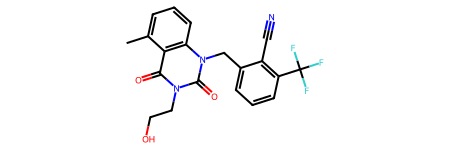

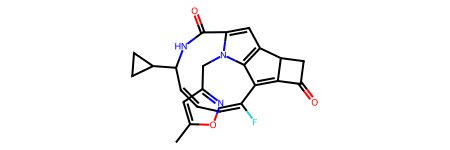

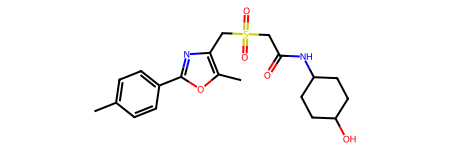

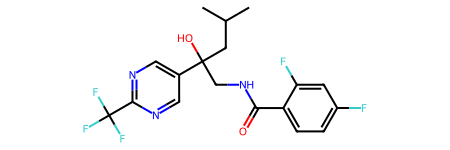

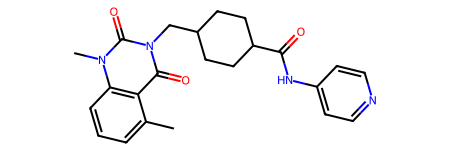

In [49]:
def simple_display(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        display(mol)
        
for smi in df_filtered['smiles'].head():
    simple_display(smi)

In [52]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


X = df_filtered

tsne = TSNE(n_components=2, random_state=42, perplexity=20, n_iter=1000)
X_embedded = tsne.fit_transform(X)

# Plot with continuous color scale
plt.figure(figsize=(10, 8))
sc = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y10, cmap='viridis', s=60)
plt.colorbar(sc, label='pIC50')
plt.title('t-SNE of Molecular Descriptors (Mordred)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'Cc1cccc2c1c(=O)n(CCO)c(=O)n2Cc1cccc(C(F)(F)F)c1C#N'

In [ ]:
best_one = df_filtered


In [55]:
best_one.to_csv(('best_one.csv'))